<a href="https://colab.research.google.com/github/adanfernandez/Data-Mining/blob/main/Comparar_terminos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparar términos

## Preparación del entorno
En primer lugar, se procederá a la descarga del fichero limpio facilitado por el profesor.

In [ ]:
!pip install ndjson
!pip install shifterator
!pip install emoji --upgrade
!pip install ndjson

In [ ]:
%cd /content
!mkdir limpio
!mkdir ejercicio2
%cd limpio

!gdown --id 1brYy8Tiooo2Uw--FUmPb8lpkxJGM4cnR
!unzip tweets-limpios.ndjson.zip

## Cuerpo del ejercicio
Se obtendrán los tweets por días. El diccionario resultante tendrá 27 claves (una por día). Por otro lado, se eliminarán las palabras vacías, haciendo uso de la lista usada en el material impartido por el profesor.

In [ ]:
from tqdm import tqdm
import time
import datetime
import io
import os
import ndjson
import math

SPANISH_STOPWORDS = {'a','al','algo','algunas','algunos','ante','antes','como',
                     'con','contra','cual','cuando','de','del','desde','donde',
                     'durante','e','el','él','ella','ellas','ellos','en','entre',
                     'era','erais','éramos','eran','eras','eres','es','esa',
                     'esas','ese','eso','esos','esta','está','estaba','estabais',
                     'estábamos','estaban','estabas','estad','estada','estadas',
                     'estado','estados','estáis','estamos','están','estando',
                     'estar','estará','estarán','estarás','estaré','estaréis',
                     'estaremos','estaría','estaríais','estaríamos','estarían',
                     'estarías','estas','estás','este','esté','estéis','estemos',
                     'estén','estés','esto','estos','estoy','estuve','estuviera',
                     'estuvierais','estuviéramos','estuvieran','estuvieras',
                     'estuvieron','estuviese','estuvieseis','estuviésemos',
                     'estuviesen','estuvieses','estuvimos','estuviste',
                     'estuvisteis','estuvo','fue','fuera','fuerais','fuéramos',
                     'fueran','fueras','fueron','fuese','fueseis','fuésemos',
                     'fuesen','fueses','fui','fuimos','fuiste','fuisteis','ha',
                     'habéis','había','habíais','habíamos','habían','habías',
                     'habida','habidas','habido','habidos','habiendo','habrá',
                     'habrán','habrás','habré','habréis','habremos','habría',
                     'habríais','habríamos','habrían','habrías','han','has',
                     'hasta','hay','haya','hayáis','hayamos','hayan','hayas',
                     'he','hemos','hube','hubiera','hubierais','hubiéramos',
                     'hubieran','hubieras','hubieron','hubiese','hubieseis',
                     'hubiésemos','hubiesen','hubieses','hubimos','hubiste',
                     'hubisteis','hubo','la','las','le','les','lo','los','más',
                     'me','mi','mí','mía','mías','mío','míos','mis','mucho',
                     'muchos','muy','nada','ni','no','nos','nosotras','nosotros',
                     'nuestra','nuestras','nuestro','nuestros','o','os','otra',
                     'otras','otro','otros','para','pero','poco','por','porque',
                     'que','qué','quien','quienes','se','sea','seáis','seamos',
                     'sean','seas','será','serán','serás','seré','seréis',
                     'seremos','sería','seríais','seríamos','serían',
                     'serías','sí','sido','siendo','sin','sobre','sois','somos',
                     'son','soy','su','sus','suya','suyas','suyo','suyos','también',
                     'tanto','te','tendrá','tendrán','tendrás','tendré','tendréis',
                     'tendremos','tendría','tendríais','tendríamos','tendrían',
                     'tendrías','tened','tenéis','tenemos','tenga','tengáis',
                     'tengamos','tengan','tengas','tengo','tenía','teníais',
                     'teníamos','tenían','tenías','tenida','tenidas','tenido',
                     'tenidos','teniendo','ti','tiene','tienen','tienes','todo',
                     'todos','tu','tú','tus','tuve','tuviera','tuvierais',
                     'tuviéramos','tuvieran','tuvieras','tuvieron','tuviese',
                     'tuvieseis','tuviésemos','tuviesen','tuvieses','tuvimos',
                     'tuviste','tuvisteis','tuvo','tuya','tuyas','tuyo','tuyos',
                     'un','una','uno','unos','vosotras','vosotros','vuestra',
                     'vuestras','vuestro','vuestros','y','ya','yo'}

def quitar_tildes_n_pasar_mayusculas(texto):
  texto = texto.lower()
  texto = texto.replace('á', 'a')
  texto = texto.replace('é', 'e')
  texto = texto.replace('í', 'i')
  texto = texto.replace('ó', 'o')
  texto = texto.replace('ú', 'u')
  texto = texto.replace('ñ', 'n')
  return texto


def tweets_dias(jsons, tweets_dias):
  for tuit in jsons:
    dtime = tuit['created_at']
    timestamp = time.mktime(datetime.datetime.strptime(dtime,'%a %b %d %H:%M:%S +0000 %Y').timetuple())
    timestamp=str(math.floor(timestamp/86400)*86400)
    lista = []
    if timestamp not in tweets_dias:
      tweets_dias[timestamp]=[]
      print(timestamp)
    lista += tuit['tokens']
    lista += tuit['noun_chunks']
    for hashtag in tuit['hashtags']:
      if hashtag:
        lista += quitar_tildes_n_pasar_mayusculas(hashtag['text'])
    tweets_dias[timestamp] += filter(lambda x: len(str(x)) > 1 and x  not in {'http','https','www','com','tinyurl','html','twitter', 'rt', 'reuters', 'bbc', 'cnn'} and x not in SPANISH_STOPWORDS, lista)
  return tweets_dias


def ejercicio3():
  f = io.open("tweets-limpios.ndjson", mode="r", encoding="utf-8")
  tamano_leido=0
  tamano_bloque=20*1024*1024
  tamano = os.path.getsize("tweets-limpios.ndjson")

  segmentados = []
  tweets={}

  while True:
    content = f.readlines(tamano_bloque)
    content = " ".join(content)
    tamano_leido += tamano_bloque
    if not content:
      break
    else:
      jsons = ndjson.loads(content)
      tweets = tweets_dias(jsons, tweets)
  return tweets

tweets = ejercicio3()

Tras esto, se obtendrá obtendrá la frecuencia de términos por día.

In [ ]:
import io
import ndjson
import operator
import os

from collections import Counter
from tqdm import tqdm

def contar_palabras_dias():
  frecuencia = {}
  for key in tweets.keys():
    frecuencias_value = []
    for value in tweets[key]:
      frecuencias_value.append(value)
    lista =  Counter(frecuencias_value)
    frecuencia[key] = sorted(lista.items(),key=operator.itemgetter(1),reverse=True)
  return frecuencia

frecuencia_dias = contar_palabras_dias()

### Word shift graphs
Una vez se tienen las frecuencias de palabras por día, se procede a utilizar *Word shift graphs*. Para ello, se obtienen las claves ordenadas y se aplica la clave en segunda posición respecto a la primera. De esta manera, no se compara a futuro, siendo los resultados más realistas.

In [ ]:
for key in frecuencia_dias:
  print(key)

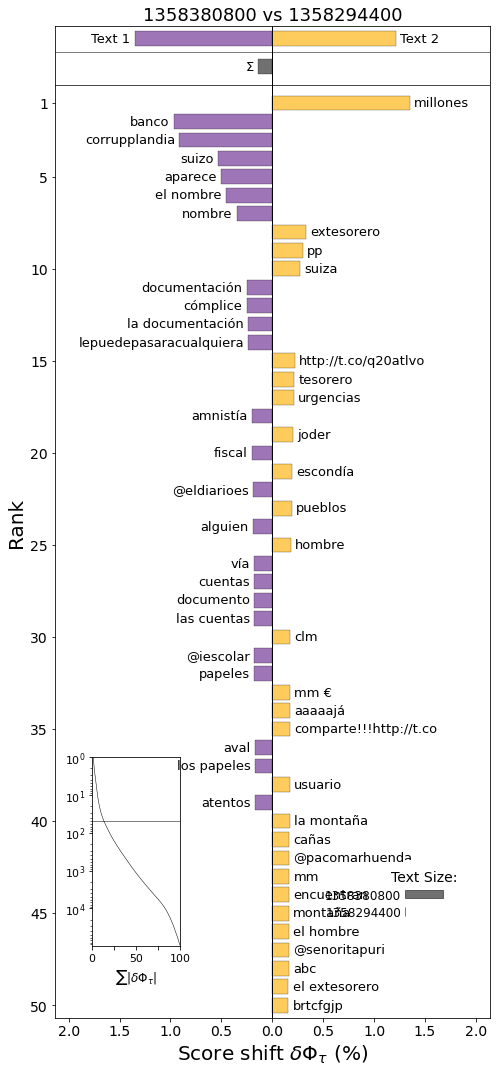

In [ ]:
import shifterator as sh

def wordshift_graphs(corpus_a, corpus_b, label_a, label_b, titulo):
    jsd_shift = sh.JSDivergenceShift(type2freq_1=corpus_a, type2freq_2=corpus_b, weight_1=0.5, weight_2=0.5, base=2, alpha=1)
    jsd_shift.get_shift_graph(system_names=[label_a, label_b], title=titulo)

wordshift_graphs(dict(frecuencia_dias['1358380800']), dict(frecuencia_dias['1358294400']), "1358380800", "1358294400", "1358380800 vs 1358294400")

### Signed root log likelihood ratio

In [ ]:
import math


def root_log_likelihood_ratio(a, b, c, d):
    # a frequency of token of interest in dataset A
    # b frequency of token of interest in dataset B
    # c total number of observations in dataset A
    # d total number of observations in dataset B

    e1 = c*(a+b)/(c+d)
    e2 = d*(a+b)/(c+d)

    result = 2*(a*math.log(a/e1+(1 if a == 0 else 0))+b*math.log(b/e2+(1 if b == 0 else 0)))
    result = math.sqrt(result)

    if (a/c)<(b/d):
        result = -result

    return result


def comparar_llr(corpus_a, corpus_b):
    c = sum(corpus_a.values())
    d = sum(corpus_b.values())

    llr_values = {}

    for token, a in corpus_a.items():
        if token in corpus_b:
            b = corpus_b[token]
            llr = root_log_likelihood_ratio(a, b, c, d)
            if llr > 0:
                llr_values[token] = llr

    llr_values = sorted(llr_values.items(), key=lambda x: x[1], reverse=True)

    return llr_values

Comparamos días

In [ ]:
import pprint


comparativa = comparar_llr(dict(frecuencia_dias['1358380800']), dict(frecuencia_dias['1358294400']))

pprint.pprint(comparativa[0:15])
